In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from scipy import stats

warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv('Raw Data/train_V2.csv')


In [3]:
print('Original size: {0}'.format(len(df)))

Original size: 4446966


In [9]:
in_match_player_features = ['assists','boosts','damageDealt','DBNOs','headshotKills',
                           'killPlace','killPoints','kills','killStreaks','longestKill',
                           'revives','rideDistance','roadKills','swimDistance','roadKills',
                            'swimDistance','teamKills','vehicleDestroys','walkDistance',
                            'weaponsAcquired']

prediction_feature = ['winPlacePerc']

global_player_features = ['killPoints','winPoints','rankPoints']

match_features = ['groupId','matchId','matchDuration']

In [41]:
df = df[(np.abs(stats.zscore(df[in_match_player_features])) < 3).all(axis=1)]


In [42]:
print('After outliers removal: {0}'.format(len(df)))

After outliers removal: 3669617


<b>Players that didn't walk probably were disconected. These data shoud not be analysed</b>

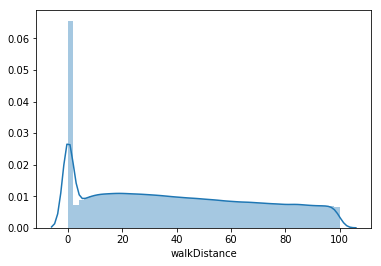

In [13]:
sns.distplot(df[(df.walkDistance<100)]['walkDistance'])

In [43]:
percentual_of_players_didnt_walk = (df[df.walkDistance==0].shape[0])/(df.shape[0])

In [44]:
print('{0}% of players didnt walk and probably were disconected'.format(np.round(percentual_of_players_didnt_walk,2)*100))

3.0% of players didnt walk and probably were disconected


In [45]:
df = df[df.walkDistance>0]

In [46]:
print('After walk criteria: {0}'.format(len(df)))

After walk criteria: 3573375


In [47]:
df.to_csv('Cleaned Data/data_cleaned.csv')